In [186]:
import pandas as pd
import numpy as np
from scipy import stats

In [187]:
global_temp = pd.read_csv("GlobalTemperatures.csv")

global_temp_byState = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

global_temp_byCity = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

In [188]:
def season(month):
    if month in (3,4,5):
        return 'Spring'
    elif month in (6,7,8):
        return 'Summer'
    elif month in (9,10,11):
        return 'Autumn'
    else:
        return 'Winter'

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['month'] = global_temp['dt'].dt.month
global_temp['Season'] = global_temp['month'].apply(season)
global_temp['Year'] = global_temp['dt'].dt.year
global_temp=global_temp.dropna()

In [189]:
data=global_temp.groupby(['Year','Season'])['LandAverageTemperature'].mean()
data=data.reset_index()
data=data[data['Year']>1850]

In [190]:
Season_List=['Summer','Autumn','Winter','Spring']
color_List=['r','orange','black','g']
corr=np.array([]) 

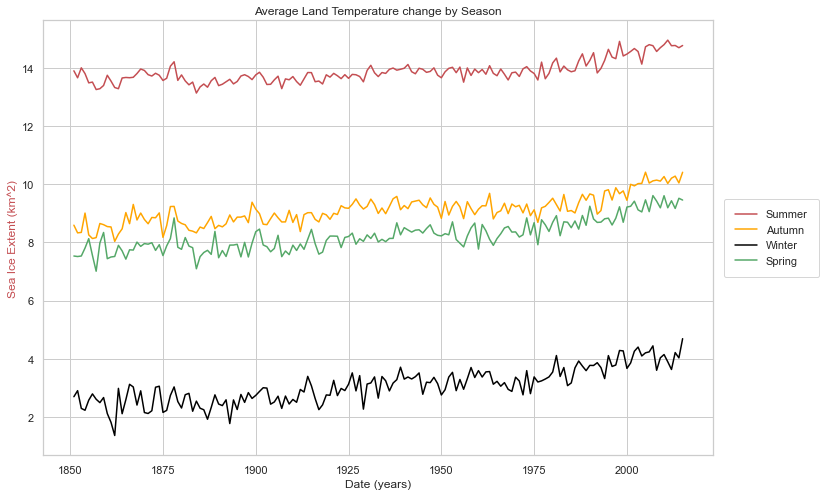

In [191]:
fig,ax = plt.subplots(figsize=(12, 8))
sns.set(style="whitegrid")

for i in range(0,len(Season_List)):
    dataSet = data[data['Season'] == str(Season_List[i])]
    x_data = dataSet['Year']
    y_data = dataSet['LandAverageTemperature']
    corr = np.append(corr,stats.pearsonr(x_data, y_data)[0])
    
    plt.plot(x_data,y_data,color=color_List[i],label=Season_List[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1) 
ax.set_xlabel('Date (years)')
ax.set_ylabel('Sea Ice Extent (km^2)',color='r')
ax.set_title('Average Land Temperature change by Season')
plt.show() 


In [195]:
#the correlation coefficient for each respective month
print("The Correlation coefficient for Summer is: ",corr[0])
print("The Correlation coefficient for Autumn is: ",corr[1])
print("The Correlation coefficient for Winter is: ",corr[2])
print("The Correlation coefficient for Spring is: ",corr[3])

The Correlation coefficient for Summer is:  0.7398588790963826
The Correlation coefficient for Autumn is:  0.8068950785927584
The Correlation coefficient for Winter is:  0.8262629076135775
The Correlation coefficient for Spring is:  0.8231018085283798
